## 1. pandas backbone are 2 objects

In [1]:
# one is dataframe and another is series object

In [2]:
import pandas as pd 

In [25]:
villages = pd.DataFrame(columns=["village_name","village_population","taluka"],data=[["gonavadi",300,"ambegaon"],["savargaon",250,"junnar"],["katraj",1035,"pimpri chinchwad"]])

In [26]:
villages

,village_name,village_population,taluka
0,gonavadi,300,ambegaon
1,savargaon,250,junnar
2,katraj,1035,pimpri chinchwad


In [27]:
# type of dataframe
type(villages)

pandas.core.frame.DataFrame

In [28]:
# type of series i.e. columns
type(villages['taluka'])

pandas.core.series.Series

In [29]:
villages.drop_duplicates()

,village_name,village_population,taluka
0,gonavadi,300,ambegaon
1,savargaon,250,junnar
2,katraj,1035,pimpri chinchwad


In [30]:
#villages['village_population'].drop_duplicates()

## 2. Indexes 

In [31]:
villages.set_index('village_population')

,village_name,taluka
village_population,,
300,gonavadi,ambegaon
250,savargaon,junnar
1035,katraj,pimpri chinchwad


In [33]:
villages.sort_values('village_population',inplace=True)

In [34]:
villages

,village_name,village_population,taluka
1,savargaon,250,junnar
0,gonavadi,300,ambegaon
2,katraj,1035,pimpri chinchwad


<Axes: >

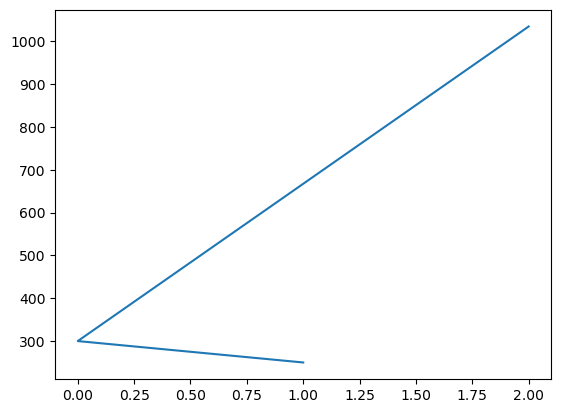

In [39]:
# as you can see indexes are messed up due to sort values 
villages['village_population'].plot()

In [40]:
# so we get messed up result plot also due to index mismatch at x-axis

In [41]:
villages.reset_index(inplace=True)
villages

,index,village_name,village_population,taluka
0,1,savargaon,250,junnar
1,0,gonavadi,300,ambegaon
2,2,katraj,1035,pimpri chinchwad


<Axes: >

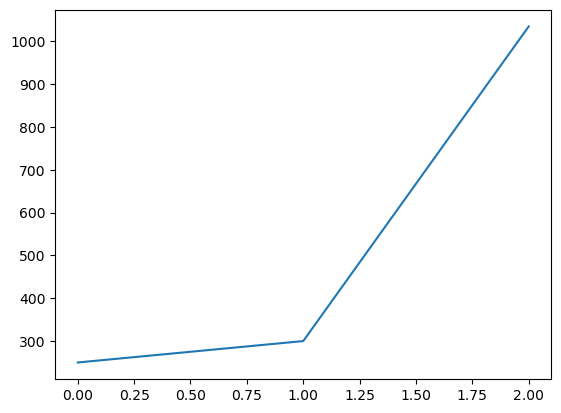

In [43]:
villages['village_population'].plot()

In [44]:
# now after reset index our graph is normal for series village popluation

In [54]:
# now drop mismatch index series from villages dataframe
villages.drop(columns=['index'],inplace=True)

In [61]:
villages

,village_name,village_population,taluka
0,savargaon,250,junnar
1,gonavadi,300,ambegaon
2,katraj,1035,pimpri chinchwad


## 3. Iterating Preproccess (efficiently)

In [82]:
villages=villages.assign(sarpanch=['Male','Female','Male'])

In [85]:
# now we've added sarpanch column 
villages

,village_name,village_population,taluka,sarpanch
0,savargaon,250,junnar,Male
1,gonavadi,300,ambegaon,Female
2,katraj,1035,pimpri chinchwad,Male


In [99]:
# lets iterate population for next 2.5 years 
villages['village_population_5yrs'] = villages['village_population']*2.5
villages

,village_name,village_population,taluka,sarpanch,village_population_5yrs,sarpanch in binary
0,savargaon,250,junnar,Male,625.0,1
1,gonavadi,300,ambegaon,Female,750.0,0
2,katraj,1035,pimpri chinchwad,Male,2587.5,1


In [96]:
villages['sarpanch in binary'] = villages['sarpanch'].apply(lambda x:1 if x=="Male" else(0 if x=="Female" else None))

In [98]:
# now we've binary for male sarpanch as 1 and female as 0
villages

,village_name,village_population,taluka,sarpanch,village_population_5yrs,sarpanch in binary
0,savargaon,250,junnar,Male,625.0,1
1,gonavadi,300,ambegaon,Female,750.0,0
2,katraj,1035,pimpri chinchwad,Male,2587.5,1


In [101]:
#villages.fillna('this used to be empty')

## 4.  efficient filtering

In [103]:
# basically used for subset of dataframe
# troubleshooting while things are not going the way you want

In [104]:
# we need 2 things one is shell and another is condition 
villages['sarpanch'] == 'Female'

0    False
1     True
2    False
Name: sarpanch, dtype: bool

In [106]:
villages[villages['sarpanch']=='Male']

,village_name,village_population,taluka,sarpanch,village_population_5yrs,sarpanch in binary
0,savargaon,250,junnar,Male,625.0,1
2,katraj,1035,pimpri chinchwad,Male,2587.5,1


In [107]:
# none values
villages[villages['village_population'].isna()]

,village_name,village_population,taluka,sarpanch,village_population_5yrs,sarpanch in binary


In [108]:
# negation non values
villages[-villages['village_population'].isna()]

,village_name,village_population,taluka,sarpanch,village_population_5yrs,sarpanch in binary
0,savargaon,250,junnar,Male,625.0,1
1,gonavadi,300,ambegaon,Female,750.0,0
2,katraj,1035,pimpri chinchwad,Male,2587.5,1


In [112]:
# certain range values
villages[villages['village_population'].isin([250,1035])]

,village_name,village_population,taluka,sarpanch,village_population_5yrs,sarpanch in binary
0,savargaon,250,junnar,Male,625.0,1
2,katraj,1035,pimpri chinchwad,Male,2587.5,1


In [117]:
# combine 2 series either using AND or using OR 
# first we see AND
villages[(villages["taluka"]=="junnar") & (villages["village_population_5yrs"].isin([625.0,750.0]))]

,village_name,village_population,taluka,sarpanch,village_population_5yrs,sarpanch in binary
0,savargaon,250,junnar,Male,625.0,1


In [118]:
#now using OR 
villages[(villages["taluka"]=="junnar") | (villages["village_population_5yrs"].isin([625.0,750.0]))]

,village_name,village_population,taluka,sarpanch,village_population_5yrs,sarpanch in binary
0,savargaon,250,junnar,Male,625.0,1
1,gonavadi,300,ambegaon,Female,750.0,0
